##### 7. In Section 8.3.3, we applied random forests to the Boston data using max_features = 6 and using n_estimators = 100 and n_estimators = 500\. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for max_features and n_estimators. You can model your plot after Figure 8.10. Describe the results obtained.


In [16]:
import numpy as np 
import pandas as pd
from ISLP import load_data
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV

In [3]:
df = load_data("Boston")
x_train, x_test, y_train, y_test = train_test_split(df.drop('medv', axis=1), df['medv'])

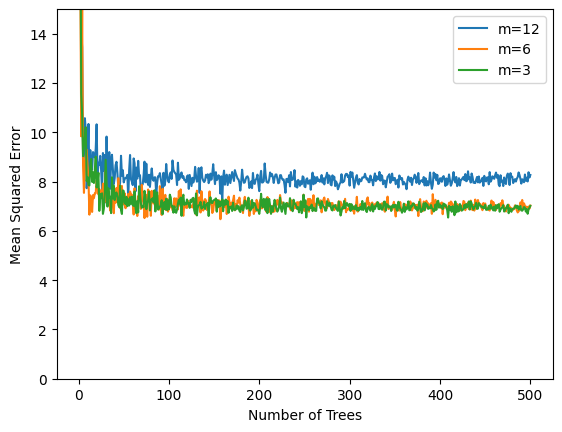

In [18]:
p = x_train.shape[1]
for i in [p, int(p/2), np.sqrt(p).astype(int)]:
    mse = np.zeros(500)
    for j in range(1, 501):
        model = RandomForestRegressor(max_features=i, n_estimators=j).fit(x_train, y_train)
        mse[j-1] = MSE(y_test, model.predict(x_test))
    plt.plot(range(1, 501), mse, label=f'm={i}')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Squared Error')
plt.ylim(0, 15)
plt.legend()